# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


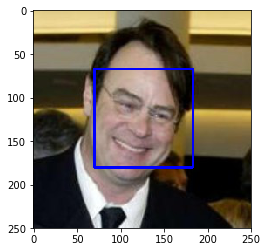

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()



Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [4]:
img = cv2.imread(human_files[0])
print (np.shape(img))

human_files[0]


(250, 250, 3)


'/data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg'

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(1- 98%
2- 17%)

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_faces_detected = 0

for i in human_files_short:
    if face_detector(i):
        human_faces_detected += 1
human_dog_faces_detected = 0        
for i in dog_files_short:
    if face_detector(i):
        human_dog_faces_detected +=1
        
print ('human faces detected:', human_faces_detected/ len(human_files_short)*100,"%")
print ('human_in_dog faces detected:', human_dog_faces_detected/ len(dog_files_short)*100,"%")

    

human faces detected: 98.0 %
human_in_dog faces detected: 17.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
   

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:16<00:00, 32939675.12it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms



def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    #loading the image
    img = Image.open(img_path)
    
    #transformations for the input image
    transform_img = transforms.Compose([transforms.Resize((224,224)), 
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))])
    
    #VGG16 wants a tensor with 4-dim so we are adding additional axis and applying tensor pre-proccessing
    img = transform_img(img).unsqueeze(0)
    
    if use_cuda:
        
        img = img.cuda()
    
    
    ## Return the *index* of the predicted class for that image
    
    
    image = VGG16(img)
    if use_cuda:
        image = image.cpu()
    image=torch.argmax(image).item()
    
    return image
# predicted class index

In [9]:

image = Image.open(human_files[0])

# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)

JPEG
RGB
(250, 250)


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    if VGG16_predict(img_path)>= 151 and VGG16_predict(img_path) <=268:
        return True
    else:
        return False

In [11]:
print (dog_detector(dog_files[0]))

True


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  1- 0% 

2- 100%


In [12]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
from tqdm import tqdm
#checking for humans look like dogs breed
human_f_like_dog=0
for i in tqdm(human_files_short):
    if dog_detector(i):
        human_f_like_dog += 1
        
#checking for dogs images
dogs_faces = 0
for i in tqdm(dog_files_short):
    if dog_detector(i):
        dogs_faces += 1
        
print('Humans images look like dogs detected:', human_f_like_dog)
print('Dog images detected:', dogs_faces)


100%|██████████| 100/100 [00:09<00:00, 10.91it/s]

Humans images look like dogs detected: 2
Dog images detected: 100


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import os
import torch
import torchvision.datasets as datasets

batch_size=10
num_workers=0
data_dir= 'data/dog_images'
data_dir= 'data/dog_images'
data_dir= 'data/dog_images'

transform_train = transforms.Compose([transforms.Resize(256),
                                      transforms.RandomRotation(30),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

transform_valid_test = transforms.Compose([transforms.Resize(256),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])




train_data = datasets.ImageFolder('/data/dog_images/train',transform=transform_train)
valid_data = datasets.ImageFolder('/data/dog_images/valid', transform=transform_valid_test)
test_data  = datasets.ImageFolder('/data/dog_images/test',  transform=transform_valid_test)

loaders_scratch = {};
loaders_scratch['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=0, shuffle=True)
loaders_scratch['valid'] = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=0)
loaders_scratch['test']  = torch.utils.data.DataLoader(test_data , batch_size=batch_size, num_workers=0)


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 1- Croppoing, the tensor is resizeed to= 256x256, then it is cropped to 224x224 then normalized after the                          augmentation. 
            2- yes, flips, and rotations by 30 degrees.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## the architecture of VGG-16
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 128, 3)
        self.conv5 = nn.Conv2d(128, 256, 3)
        
        self.fc1 =nn.Linear(256 * 5 * 5, 1024)
        self.fc2 =nn.Linear(1024, 500)
        self.fc3 =nn.Linear(500, 133)
        self.max_pool = nn.MaxPool2d(2, 2)
        
        self.dropout = nn.Dropout(0.20)
        
        self.conv_bn = nn.BatchNorm2d(224,3)
        self.conv_bn1 = nn.BatchNorm2d(16)
        self.conv_bn2 = nn.BatchNorm2d(32)
        self.conv_bn3 = nn.BatchNorm2d(64)
        self.conv_bn4 = nn.BatchNorm2d(128)
        self.conv_bn5 = nn.BatchNorm2d(256)
        
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = self.conv_bn1(x)

        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = self.conv_bn2(x)

        x = F.relu(self.conv3(x))
        x = self.max_pool(x)
        x = self.conv_bn3(x)

        x = F.relu(self.conv4(x))
        x = self.max_pool(x)
        x = self.conv_bn4(x)

        x = F.relu(self.conv5(x))
        x = self.max_pool(x)
        x = self.conv_bn5(x)

        x = x.view(-1, 256 * 5 * 5)

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [15]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=6400, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=133, bias=True)
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2)
  (conv_bn): BatchNorm2d(224, eps=3, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I have a tensor that Cropped to 224x224 so I have created the conv layers where the first layer recieves the tensor with depth of 3 and kernel size (3x3) and a max pooling layer is applied after each layer to reduce the size of tensor and the conv layers increasing the depth.
I have 133 classes so the fully conncted layer architecture need to output 133

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim
 
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

In [17]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss = train_loss+((1/ (batch_idx +1)) * (loss.data -train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
           
            valid_loss = valid_loss+((1/ (batch_idx +1)) * (loss.data -valid_loss))
            
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f}  --> {:.6f}).  saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss
            
            
    # return trained model
    return model


# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 0.000721 	Validation Loss: 0.005527
Validation loss decreased (inf  --> 0.005527).  saving model...


 10%|█         | 2/20 [04:10<40:11, 133.99s/it]

Epoch: 2 	Training Loss: 0.000691 	Validation Loss: 0.005337
Validation loss decreased (0.005527  --> 0.005337).  saving model...


 15%|█▌        | 3/20 [05:53<35:20, 124.75s/it]

Epoch: 3 	Training Loss: 0.000673 	Validation Loss: 0.005121
Validation loss decreased (0.005337  --> 0.005121).  saving model...


 20%|██        | 4/20 [07:36<31:31, 118.24s/it]

Epoch: 4 	Training Loss: 0.000660 	Validation Loss: 0.005052
Validation loss decreased (0.005121  --> 0.005052).  saving model...


 25%|██▌       | 5/20 [09:19<28:25, 113.67s/it]

Epoch: 5 	Training Loss: 0.000651 	Validation Loss: 0.004884
Validation loss decreased (0.005052  --> 0.004884).  saving model...


 30%|███       | 6/20 [11:02<25:46, 110.47s/it]

Epoch: 6 	Training Loss: 0.000638 	Validation Loss: 0.004814
Validation loss decreased (0.004884  --> 0.004814).  saving model...


 35%|███▌      | 7/20 [12:45<23:27, 108.28s/it]

Epoch: 7 	Training Loss: 0.000631 	Validation Loss: 0.004705
Validation loss decreased (0.004814  --> 0.004705).  saving model...


 40%|████      | 8/20 [14:28<21:19, 106.63s/it]

Epoch: 8 	Training Loss: 0.000624 	Validation Loss: 0.004590
Validation loss decreased (0.004705  --> 0.004590).  saving model...


 45%|████▌     | 9/20 [16:11<19:21, 105.55s/it]

Epoch: 9 	Training Loss: 0.000614 	Validation Loss: 0.004470
Validation loss decreased (0.004590  --> 0.004470).  saving model...


 50%|█████     | 10/20 [17:54<17:26, 104.63s/it]

Epoch: 10 	Training Loss: 0.000606 	Validation Loss: 0.004442
Validation loss decreased (0.004470  --> 0.004442).  saving model...


 55%|█████▌    | 11/20 [19:36<15:34, 103.88s/it]

Epoch: 11 	Training Loss: 0.000598 	Validation Loss: 0.004372
Validation loss decreased (0.004442  --> 0.004372).  saving model...


 60%|██████    | 12/20 [21:19<13:49, 103.66s/it]

Epoch: 12 	Training Loss: 0.000593 	Validation Loss: 0.004392


 65%|██████▌   | 13/20 [23:02<12:03, 103.36s/it]

Epoch: 13 	Training Loss: 0.000582 	Validation Loss: 0.004284
Validation loss decreased (0.004372  --> 0.004284).  saving model...


 70%|███████   | 14/20 [24:45<10:19, 103.25s/it]

Epoch: 14 	Training Loss: 0.000576 	Validation Loss: 0.004215
Validation loss decreased (0.004284  --> 0.004215).  saving model...


 75%|███████▌  | 15/20 [26:27<08:35, 103.04s/it]

Epoch: 15 	Training Loss: 0.000573 	Validation Loss: 0.004214
Validation loss decreased (0.004215  --> 0.004214).  saving model...


 80%|████████  | 16/20 [28:10<06:52, 103.07s/it]

Epoch: 16 	Training Loss: 0.000567 	Validation Loss: 0.004207
Validation loss decreased (0.004214  --> 0.004207).  saving model...


 85%|████████▌ | 17/20 [29:53<05:08, 102.93s/it]

Epoch: 17 	Training Loss: 0.000562 	Validation Loss: 0.004046
Validation loss decreased (0.004207  --> 0.004046).  saving model...


 90%|█████████ | 18/20 [31:36<03:25, 102.93s/it]

Epoch: 18 	Training Loss: 0.000553 	Validation Loss: 0.003997
Validation loss decreased (0.004046  --> 0.003997).  saving model...


 95%|█████████▌| 19/20 [33:19<01:42, 102.86s/it]

Epoch: 19 	Training Loss: 0.000548 	Validation Loss: 0.003941
Validation loss decreased (0.003997  --> 0.003941).  saving model...


100%|██████████| 20/20 [35:01<00:00, 102.77s/it]

Epoch: 20 	Training Loss: 0.000547 	Validation Loss: 0.003890
Validation loss decreased (0.003941  --> 0.003890).  saving model...


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.270101


Test Accuracy: 20% (169/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
## TODO: Specify data loaders
import torch
import os
import torchvision.datasets as datasets
from torchvision import transforms

batch_size=10
num_workers=0


transform_train = transforms.Compose([transforms.Resize(256),
                                      transforms.RandomRotation(25),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

transform_valid_test = transforms.Compose([transforms.Resize(256),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])




train_data = datasets.ImageFolder('/data/dog_images/train', transform=transform_train)
valid_data = datasets.ImageFolder('/data/dog_images/valid', transform=transform_valid_test)
test_data  = datasets.ImageFolder('/data/dog_images/test',  transform=transform_valid_test)

loaders_transfer = {}
loaders_transfer['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=0, shuffle=True)
loaders_transfer['valid'] = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=0)
loaders_transfer['test']  = torch.utils.data.DataLoader(test_data , batch_size=batch_size, num_workers=0)




### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)
print(model_transfer)


if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [21]:
#Number of input and output 
print(model_transfer.classifier[6].in_features)
print(model_transfer.classifier[6].out_features)

4096
1000


In [22]:
#freezing the model features parameters
for param in model_transfer.features.parameters():
    param.requirs_grad=False

In [23]:
import torch.nn as nn

#changing the last layer's parameters of vgg16 and adjust the output classes number to   133

#number of features of the last layer
n_inputs= model_transfer.classifier[6].in_features

#customizing the last layer
last_layer=nn.Linear(n_inputs, 133)
model_transfer.classifier[6]=last_layer

#check if GPU available
if use_cuda:
    model_transfer.cuda()
    
#Check if the last layer give the desired output
print(model_transfer.classifier[6].out_features)

133


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I did the following steps to do transfer learning and prepare my model:

-Take a main architecture of VGG16 which has been trained on ImageNet datasets on multiple GPUs and and has a high accuracy in the image processing problems.
-Then I have modified the last layer of the classifier which had (4096, 1000) and change it to have (4096, 133) 133 is the number of the classes that I want.
-After changing the last layer I added it back to the trained model.
-Then I freezed all the layers of the model except for the classifier layers because I wanted to train them.
-I used the crossentropyloss function and SGD optimizer with a learning rate of 0.01
-Then I trained the model for 6 epochs for many times using different learning rates started from 0.001 to 0.05 and finally used 0.01 which gave the best result where I got 0.000186, 0.000833 for the training and validation loss respectively. and saved the model at the lowest validation loss.

-The last step was to test the model which give 80% test accuracy which considered very good accuarcy for this number of epochs.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [24]:
import torch.optim as optim

#loss function
criterion_transfer =nn.CrossEntropyLoss()

#Specifying the optimizer
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr= 0.01)

In [25]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [26]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# train the model
n_epochs = 6


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # Loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # Optimization
            optimizer.step()
            # update training loss
            # train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
          
            output = model(data)
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
                
            # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
            

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss  
            
    # return trained model
    return model


model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer,
                       use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 0.000326 	Validation Loss: 0.000987
Validation loss decreased (inf --> 0.000987).  Saving model ...


 17%|█▋        | 1/6 [08:08<40:42, 488.54s/it]

Epoch: 2 	Training Loss: 0.000227 	Validation Loss: 0.000822
Validation loss decreased (0.000987 --> 0.000822).  Saving model ...


 50%|█████     | 3/6 [24:23<24:24, 488.01s/it]

Epoch: 3 	Training Loss: 0.000208 	Validation Loss: 0.000885
Epoch: 4 	Training Loss: 0.000197 	Validation Loss: 0.000686
Validation loss decreased (0.000822 --> 0.000686).  Saving model ...


 83%|████████▎ | 5/6 [40:38<08:07, 487.77s/it]

Epoch: 5 	Training Loss: 0.000184 	Validation Loss: 0.000748


100%|██████████| 6/6 [48:45<00:00, 487.46s/it]

Epoch: 6 	Training Loss: 0.000186 	Validation Loss: 0.000833


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [26]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.648431


Test Accuracy: 80% (677/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [27]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path)
    
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    
    #check for GPU availability
    if use_cuda:
        image=image.cuda()
        
    #passing the tensor through our model
    
    predect = model_transfer(image)
    predect = predect.data.cpu().argmax()
    return class_names[predect]


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [28]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from PIL import Image

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
    if dog_detector(img_path) is True:
        predection = predict_breed_transfer(img_path)
        print ("Hello catchy dog you are a {0} breed".format(predection))
        
    elif face_detector(img_path) > 0:
        predection = predict_breed_transfer(img_path)
        print("Hello Mr.Human you look like a {0}".format(predection))
        
    else:
        print('Neither is predected')


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
It was worse... I think we can try the following:
1- We can try differeny data augmentation techniques I think this can give us higher accuracy and let the to better understand the data.
2- We can provide it with more data so it can learn more and better identify different breeds.

3- Lastly i think we can modify the classifier layers and the feature layers (Conv layers) to be deeper and extract more features from the training pictures.

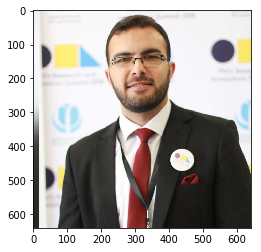

Hello Mr.Human you look like a Dachshund


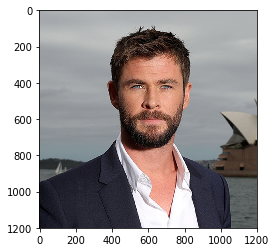

Hello Mr.Human you look like a Welsh springer spaniel


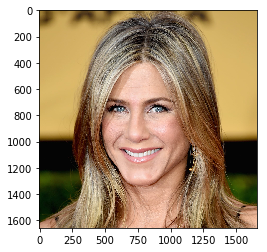

Hello Mr.Human you look like a Afghan hound


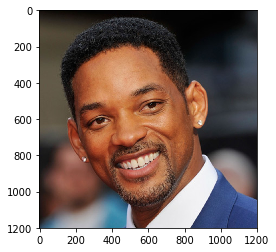

Hello Mr.Human you look like a Dogue de bordeaux


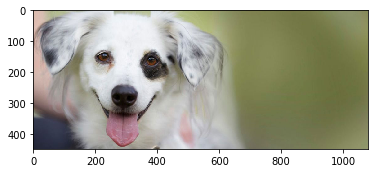

Hello catchy dog you are a Australian shepherd breed


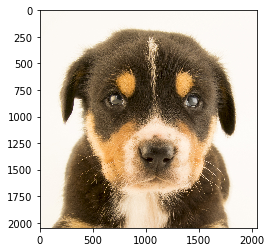

Hello catchy dog you are a Entlebucher mountain dog breed


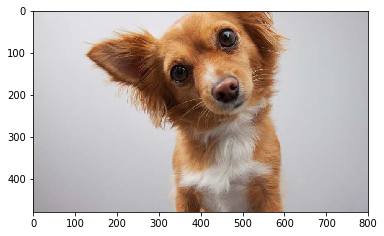

Hello catchy dog you are a Papillon breed


In [29]:
random_pics = ['./Malek/0.jpg' ,'./Malek/1.jpg', './Malek/2.jpg', './Malek/3.jpg' ] 
dog_pics = ['./Malek/4.jpg', './Malek/5.jpg', './Malek/6.jpg']   
for file in np.hstack((random_pics, dog_pics)):     
        run_app(file)
